In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
C_syn_e = np.load("/media/hdd01/sklee/CA1_clust4-60/data/handsub10_C_syn_e.npy")
syn_idx = [821, 580, 1211, 692, 930, 990,1050,1110]
print(np.argmax(C_syn_e[:,syn_idx], 0))

[1 2 3 5 6 7 8 9]


In [3]:
na = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/gru_s10_h20_probe.npy")
nona = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/gru_s10_h20_probe.npy")
print(na.shape)

eloc = np.load("/media/hdd01/sklee/CA1_clust12-20/data/Elocs_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")
dist = np.load("/media/hdd01/sklee/CA1_clust4-60/data/clust_dend_dist.npy")
dend = np.load("/media/hdd01/sklee/CA1_clust4-60/data/clust_dend.npy")
diam_length = np.load("/media/hdd01/sklee/CA1_clust4-60/data/dend_diam_length.npy")

nona_sub_out = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/gru_s10_h20_pos_output.npz")["sub_out"]
na_sub_out = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/gru_s10_h20_pos_output.npz")["sub_out"]
nona_range = np.zeros((10,2))
na_range = np.zeros((10,2))

for i in range(10):
    nona_low = np.mean(nona_sub_out[:,i,:]) - 2*np.std(nona_sub_out[:,i,:])
    nona_high = np.mean(nona_sub_out[:,i,:]) + 2*np.std(nona_sub_out[:,i,:])
    na_low = np.mean(na_sub_out[:,i,:]) - 2*np.std(na_sub_out[:,i,:])
    na_high = np.mean(na_sub_out[:,i,:]) + 2*np.std(na_sub_out[:,i,:])
    nona_range[i,0] = nona_low
    nona_range[i,1] = nona_high
    na_range[i,0] = na_low
    na_range[i,1] = na_high
    
den_idx = eloc[np.arange(880,1120,20), 0].astype(int)
half_idx = np.asarray([6, 5, 13, 7, 0, 7, 3, 0, 5, 0, 14, 8])
new_half_idx = np.delete(half_idx, [4,7,9])
new_den_idx = np.delete(den_idx, [4,7,9])

new_shift_idx = np.empty((9))
for i in range(9):
    idx = np.where(dend == new_den_idx[i])[0]
    new_shift_idx[i] = idx
new_shift_idx = new_shift_idx.astype(int)
clust_idx = np.asarray([0,1,2,3,5,6,8,10,11])

probe = np.load("/media/hdd01/sklee/CA1_clust12-20/hand/gru_s18_h20_probe.npy")


(8, 3, 30, 6000)


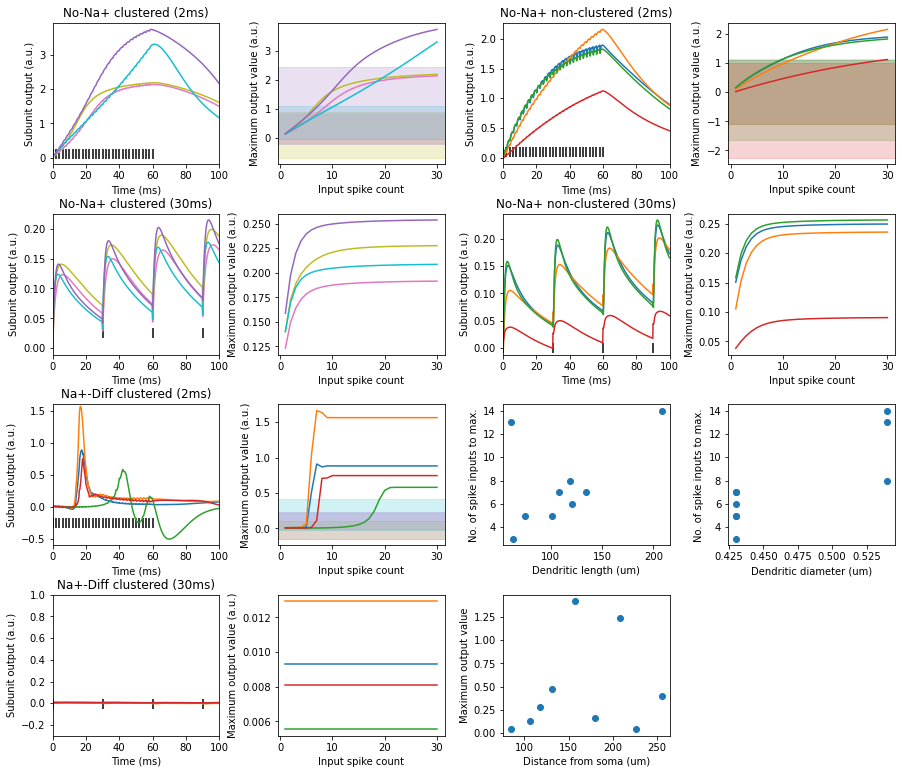

In [5]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

fig, axs = plt.subplots(nrows=4, ncols=4, figsize = (13,11))
colors = ["tab:pink", "tab:olive", "tab:cyan", "tab:purple", "tab:blue", "tab:orange", "tab:green", "tab:red"]
sub_idx = [1,2,3,5,6,7,8,9]

for i in range(4):
    axs[0,0].plot(np.arange(0,100,0.2), nona[i,0,-1,500:1000] - np.min(nona[i,0,-1,500:1000]), label="Non-clust Subunit "+str(i+1), color=colors[i])
    axs[0,1].plot(np.arange(1,31,1), np.max(nona[i,0,:,500:] - np.min(nona[i,0,-1,500:1000]), 1), label="Non-clust Subunit "+str(i+1), color=colors[i])
    axs[1,0].plot(np.arange(0,100,0.2), nona[i,2,-1,500:1000] - np.min(nona[i,2,-1,500:1000]), label="Non-clust Subunit "+str(i+1), color=colors[i])
    axs[1,1].plot(np.arange(1,31,1), np.max(nona[i,2,:,500:] - np.min(nona[i,2,-1,500:]), 1), label="Non-clust Subunit "+str(i+1), color=colors[i])
    axs[0,1].axhspan(nona_range[sub_idx[i],0], nona_range[sub_idx[i],1],0,30,color=colors[i],alpha=0.2)
    
    axs[0,2].plot(np.arange(0,100,0.2), nona[i+4,0,-1,500:1000] - np.min(nona[i+4,0,-1,500:1000]), label="Non-clust Subunit "+str(i+1), color=colors[i+4])
    axs[0,3].plot(np.arange(1,31,1), np.max(nona[i+4,0,:,500:] - np.min(nona[i+4,0,-1,500:1000]), 1), label="Non-clust Subunit "+str(i+1), color=colors[i+4])
    axs[1,2].plot(np.arange(0,100,0.2), nona[i+4,2,-1,500:1000] - np.min(nona[i+4,2,-1,500:1000]), label="Non-clust Subunit "+str(i+1), color=colors[i+4])
    axs[1,3].plot(np.arange(1,31,1), np.max(nona[i+4,2,:,500:] - np.min(nona[i+4,2,-1,500:1000]), 1), label="Non-clust Subunit "+str(i+1), color=colors[i+4])
    axs[0,3].axhspan(nona_range[sub_idx[i+4],0], nona_range[sub_idx[i+4],1],0,30,color=colors[i+4],alpha=0.2)
    
    axs[2,0].plot(np.arange(0,100,0.2), na[i,0,-1,500:1000], label="Clust Subunit "+str(i+1), color=colors[i+4])
    axs[2,1].plot(np.arange(1,31,1), np.max(na[i,0,:,500:], 1), label="Clust Subunit "+str(i+1), color=colors[i+4])
    axs[3,0].plot(np.arange(0,100,0.2), na[i,2,-1,500:1000], label="Clust Subunit "+str(i+1), color=colors[i+4])
    axs[3,1].plot(np.arange(1,31,1), np.max(na[i,2,:,500:], 1), label="Clust Subunit "+str(i+1), color=colors[i+4])
    axs[2,1].axhspan(na_range[sub_idx[i],0], na_range[sub_idx[i+4],1],0,30,color=colors[i],alpha=0.2)
    
    axs[2,0].set_ylim(-0.6,1.6)
    axs[3,0].set_ylim(-0.3,1)

axs[0,0].scatter(np.arange(0,0+2*31,2),np.ones(31)*0.1, marker="|", s=100, color="black")
axs[1,0].scatter(np.arange(0,0+30*31,30),np.ones(31)*0.025, marker="|", s=100, color="black")
axs[0,2].scatter(np.arange(0,0+2*31,2),np.ones(31)*0.1, marker="|", s=100, color="black")
axs[1,2].scatter(np.arange(0,0+30*31,30),np.ones(31)*0, marker="|", s=100, color="black")
axs[2,0].scatter(np.arange(0,0+2*31,2),np.ones(31)*(-0.25), marker="|", s=100, color="black")
axs[3,0].scatter(np.arange(0,0+30*31,30),np.ones(31)*(-0.0065), marker="|", s=100, color="black")

axs[0,0].set_xlim(0,100)
axs[1,0].set_xlim(0,100)
axs[0,2].set_xlim(0,100)
axs[1,2].set_xlim(0,100)
axs[2,0].set_xlim(0,100)
axs[3,0].set_xlim(0,100)

axs[0,0].set_ylabel("Subunit output (a.u.)")
axs[2,0].set_ylabel("Subunit output (a.u.)")
axs[0,2].set_ylabel("Subunit output (a.u.)")
axs[1,0].set_ylabel("Subunit output (a.u.)")
axs[3,0].set_ylabel("Subunit output (a.u.)")
axs[1,2].set_ylabel("Subunit output (a.u.)")
axs[0,1].set_ylabel("Maximum output value (a.u.)")
axs[0,3].set_ylabel("Maximum output value (a.u.)")
axs[2,1].set_ylabel("Maximum output value (a.u.)")
axs[1,1].set_ylabel("Maximum output value (a.u.)")
axs[1,3].set_ylabel("Maximum output value (a.u.)")
axs[3,1].set_ylabel("Maximum output value (a.u.)")
axs[0,0].set_xlabel("Time (ms)")
axs[2,0].set_xlabel("Time (ms)")
axs[0,2].set_xlabel("Time (ms)")
axs[1,0].set_xlabel("Time (ms)")
axs[3,0].set_xlabel("Time (ms)")
axs[1,2].set_xlabel("Time (ms)")
axs[0,1].set_xlabel("Input spike count")
axs[0,3].set_xlabel("Input spike count")
axs[2,1].set_xlabel("Input spike count")
axs[1,1].set_xlabel("Input spike count")
axs[1,3].set_xlabel("Input spike count")
axs[3,1].set_xlabel("Input spike count")
    
axs[0,0].set_title("No-Na+ clustered (2ms)")
axs[1,0].set_title("No-Na+ clustered (30ms)")
axs[0,2].set_title("No-Na+ non-clustered (2ms)")
axs[1,2].set_title("No-Na+ non-clustered (30ms)")
axs[2,0].set_title("Na+-Diff clustered (2ms)")
axs[3,0].set_title("Na+-Diff clustered (30ms)")

axs[2,2].scatter(diam_length[new_den_idx, 1], new_half_idx)
axs[2,3].scatter(diam_length[new_den_idx, 0], new_half_idx)
axs[3,2].scatter(dist[-1,new_shift_idx], np.max(probe[clust_idx,0,-1,:], 1))

axs[2,2].set_xlabel("Dendritic length (um)")
axs[2,2].set_ylabel("No. of spike inputs to max.")
axs[2,3].set_xlabel("Dendritic diameter (um)")
axs[2,3].set_ylabel("No. of spike inputs to max.")
axs[3,2].set_xlabel("Distance from soma (um)")
axs[3,2].set_ylabel("Maximum output value")
axs[3,3].axis("off")

plt.subplots_adjust(left=0.05,
                    bottom=0.05, 
                    right=0.95, 
                    top=0.95, 
                    wspace=0.35, 
                    hspace=0.35)

#fig.tight_layout()
#plt.show()
#fig.savefig("/home/sklee/dendrite/fig5/fig5_raw.pdf", bbox_inches="tight", transparent=True)